In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [5]:
# Load dataset
data = pd.read_csv('/Users/shaneab/Projects/Machine Learning/Expression recognition/fer20131.csv')
X = np.array([np.fromstring(pixel, dtype=int, sep=' ') for pixel in data['pixels']])
y = data['emotion'].values


In [ ]:
# Normalize pixel values
X = X / 255.0

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0


In [8]:
# Train SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)


SVC(C=1, random_state=42)

In [9]:
# Evaluate
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4449707439398161
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.24      0.31       985
           1       1.00      0.07      0.13       102
           2       0.40      0.24      0.30      1043
           3       0.48      0.73      0.58      1765
           4       0.34      0.40      0.37      1210
           5       0.64      0.50      0.56       795
           6       0.42      0.42      0.42      1278

    accuracy                           0.44      7178
   macro avg       0.53      0.37      0.38      7178
weighted avg       0.45      0.44      0.43      7178



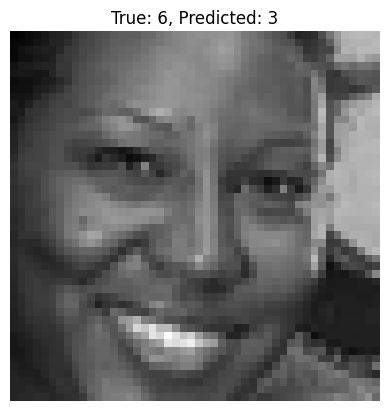

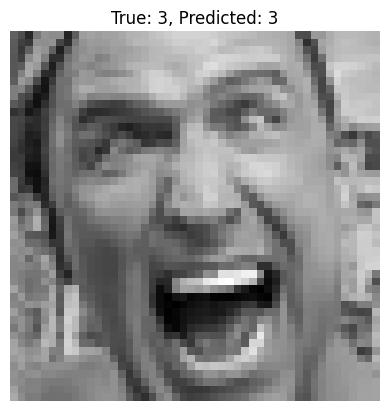

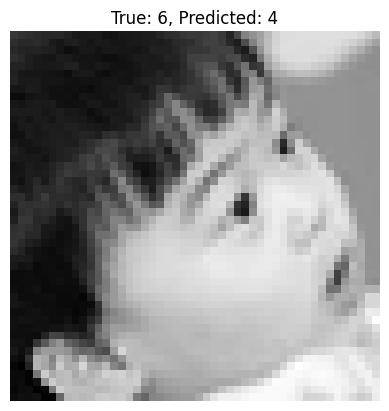

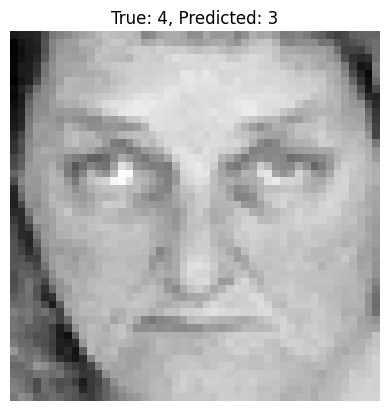

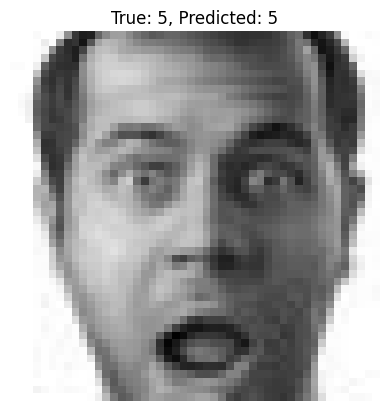

In [10]:
# Visualize random predictions
for i in range(5):
    idx = np.random.randint(0, len(X_test))
    image = X_test[idx].reshape(48, 48)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {y_test[idx]}, Predicted: {y_pred[idx]}")
    plt.axis('off')
    plt.show()